In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/traffic.csv')
df.head(5)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:
df.shape

(226278, 9)

In [ ]:
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [ ]:
from scipy import stats

## Question 1 [Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [ ]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [ ]:
df['event'].value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [ ]:
df[df['event'] == "pageview"].shape[0]

142015

In [ ]:
df[df["event"] == "pageview"].groupby(by="date")["event"].count()

,event
date,
2021-08-19,22366
2021-08-20,21382
2021-08-21,21349
2021-08-22,20430
2021-08-23,18646
2021-08-24,18693
2021-08-25,19149


In [ ]:
df_deduplicated = df.drop_duplicates()

In [ ]:
df_deduplicated["event"].value_counts()

,count
event,
pageview,73360
click,32499
preview,16708


In [ ]:
df_deduplicated[df_deduplicated["event"] == "pageview"].shape[0]

73360

In [ ]:
df_deduplicated[df_deduplicated["event"] == "pageview"].groupby(by="date")["event"].count()

,event
date,
2021-08-19,13006
2021-08-20,11088
2021-08-21,9939
2021-08-22,9982
2021-08-23,9722
2021-08-24,9705
2021-08-25,9918


## Question 2 [Pandas] What about the other recorded events?

In [ ]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [ ]:
df["event"].value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [ ]:
df[df["event"] == "click"].drop_duplicates().groupby(by="date")["event"].count()

,event
date,
2021-08-19,5860
2021-08-20,4999
2021-08-21,4279
2021-08-22,4421
2021-08-23,4314
2021-08-24,4231
2021-08-25,4395


In [ ]:
df[df["event"] == "preview"].drop_duplicates().groupby(by="date")["event"].count()

,event
date,
2021-08-19,2290
2021-08-20,2449
2021-08-21,2483
2021-08-22,2524
2021-08-23,2379
2021-08-24,2355
2021-08-25,2228


## Question 3 [Pandas] Which countries did the clicks come from?

In [ ]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [ ]:
df[df["event"] == "click"].drop_duplicates().groupby(by="country")["event"].count()

,event
country,
Albania,58
Algeria,96
American Samoa,1
Angola,21
Anguilla,1
...,...
Wallis and Futuna,1
Yemen,9
Zambia,25


## Question 4 [Pandas] What was the overall click rate (clicks/pageviews)?

In [102]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [103]:
df["event"].value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [122]:
df["click_rate"] = len(df[df["event"] == "click"].drop_duplicates().groupby(by="linkid").count())

In [123]:
df["page_view"] = len(df[df["event"] == "pageview"].drop_duplicates().groupby(by="linkid").count())

In [124]:
df["overall_click_rate"] = df["click_rate"]/df["page_view"]

In [128]:
df.groupby("linkid")[["overall_click_rate", "page_view", "click_rate"]].count().reset_index()


,linkid,overall_click_rate,page_view,click_rate
0,00073307-ae96-5089-a117-4783afb42f8e,2,2,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,4,4,4
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1,1,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1,1,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1,1,1
...,...,...,...,...
3834,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,2,2,2
3835,fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,2,2,2
3836,fff84c0e-90a1-59d8-9997-adc909d50e16,2,2,2
3837,fffc17a7-f935-5d3e-bd3e-d761fd80d479,3,3,3


## Question 5 [Pandas] How does the clickrate distribute across different links?

In [129]:
df["overall_click_rate"].describe()

,overall_click_rate
count,2.262780e+05
mean,5.876987e-01
std,1.243675e-12
min,5.876987e-01
25%,5.876987e-01
50%,5.876987e-01
75%,5.876987e-01
max,5.876987e-01


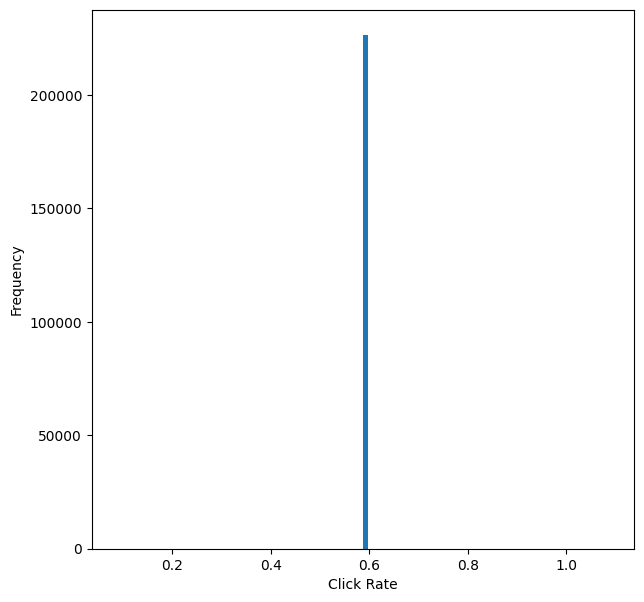

In [131]:
ax = df["overall_click_rate"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Click Rate")

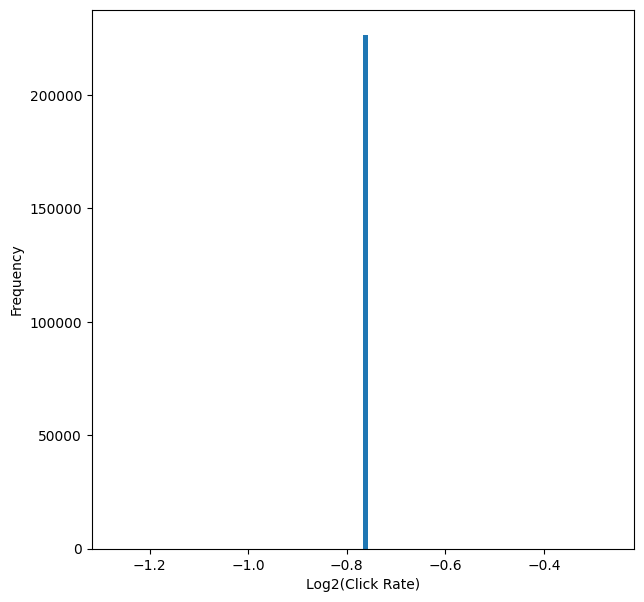

In [132]:
# because the data is highly skewed, it makes more sense to plot the log of it
df["click_rate_log2"] = np.log2(df["overall_click_rate"])
ax = df["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Log2(Click Rate)")

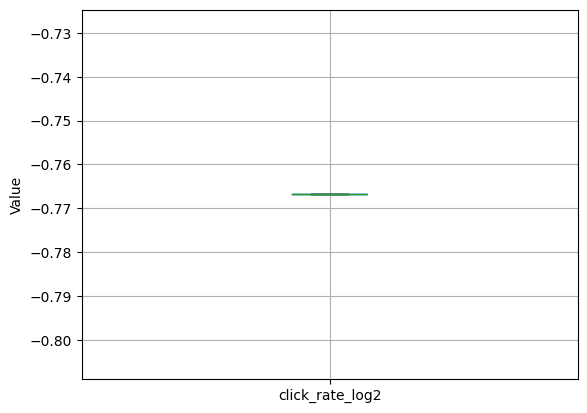

In [133]:
ax = df.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

## Question 6 [Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [134]:
# filter only events that are relevant to the question
df = df[df["event"].isin(["click", "preview"])]

In [135]:
df.describe()

,click_rate,page_view,overall_click_rate,click_rate_log2
count,84263.0,84263.0,8.426300e+04,8.426300e+04
mean,2255.0,3837.0,5.876987e-01,-7.668513e-01
std,0.0,0.0,9.546864e-13,1.646582e-12
min,2255.0,3837.0,5.876987e-01,-7.668513e-01
25%,2255.0,3837.0,5.876987e-01,-7.668513e-01
50%,2255.0,3837.0,5.876987e-01,-7.668513e-01
75%,2255.0,3837.0,5.876987e-01,-7.668513e-01
max,2255.0,3837.0,5.876987e-01,-7.668513e-01


In [136]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [137]:
# perform two database-style joins to append the
# number of link clicks and previews to each row
df = pd.merge(left=df, right=link_clicks, how="left", on="linkid")
df = pd.merge(left=df, right=previews, how="left", on="linkid")

In [138]:
df.dropna(subset=["clicks", "previews"], inplace=True)
df

,event,date,country,city,artist,album,track,isrc,linkid,click_rate,page_view,overall_click_rate,click_rate_log2,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2255,3837,0.587699,-0.766851,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2255,3837,0.587699,-0.766851,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,2255,3837,0.587699,-0.766851,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,2255,3837,0.587699,-0.766851,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2255,3837,0.587699,-0.766851,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2255,3837,0.587699,-0.766851,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,2255,3837,0.587699,-0.766851,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,2255,3837,0.587699,-0.766851,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2255,3837,0.587699,-0.766851,2109.0,1605.0


In [140]:
df.select_dtypes(include=['number']).corr()


,click_rate,page_view,overall_click_rate,click_rate_log2,clicks,previews
click_rate,NaN,NaN,NaN,NaN,NaN,NaN
page_view,NaN,NaN,NaN,NaN,NaN,NaN
overall_click_rate,NaN,NaN,NaN,NaN,NaN,NaN
click_rate_log2,NaN,NaN,NaN,NaN,NaN,NaN
clicks,NaN,NaN,NaN,NaN,1.000000,0.998713
previews,NaN,NaN,NaN,NaN,0.998713,1.000000


In [142]:
stats.pearsonr(x=df["clicks"], y=df["previews"])


PearsonRResult(statistic=np.float64(0.9987125072008586), pvalue=np.float64(0.0))

In [144]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


We observe a high positive correlation between album, artist, and track and almost no correlation between other variables. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.